# IT 362 - Princeples of Data Science

Group#3

Students names :

1- Lina Alrabeah 

2- Lina Alshiddi

3- Shekha Alabdulsalam

4- Layan AlTowaijri


# IKEA online website 
# Data collection 

we will collect 9 features for each observation 

- Name : the name of product.
- Category : the category of the product.
- Prooduct_type : the product type.
- Price : the price of the product.
- Review_count : number of reviews for product.
- Badge :is the item one of the top seller or not , so it's take 2 value ('Top seller' .'Not top seller').
- have_Different_options :is the item have other options or not "like different color" ,so it's take 2 value ('More option' ,'No option').
- New_product :is the item new or not, so it's take 2 value ('New' .'Not new').
- Discount :is the item have new discount , so it's take 2 value ('New Lower Price' , 'Not have lower price').

In [38]:
# import libraries 
import csv
import pandas as pd
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn import preprocessing
import plotly.express as px


In [39]:
# reading the ikea dataset
ikea = pd.read_csv('Ikea_datasetFinal.csv')

## 1.Short overview of the dataset

### 1.1  Number of row and column "features and observations"

In [40]:
ikea.shape

(472, 9)

#### The results:
- 472 observations 
- 8 features and 1 Response (Badge)


### 1.2 Data type

In [41]:
# get overview about the features 
ikea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    472 non-null    object
 1   Category                472 non-null    object
 2   Product_type            472 non-null    object
 3   Review_count            472 non-null    int64 
 4   Price                   472 non-null    int64 
 5   Badge                   472 non-null    object
 6   have_Different_options  472 non-null    object
 7   New_product             472 non-null    object
 8   Discount                472 non-null    object
dtypes: int64(2), object(7)
memory usage: 33.3+ KB


In [42]:
ikea.head()

,Name,Category,Product_type,Review_count,Price,Badge,have_Different_options,New_product,Discount
0,LÄTT,Children's furniture,Children's table with 2 chairs,17,199,Top seller,No option,Not new,New Lower Price
1,MAMMUT,Children's furniture,"Children's table,",6,189,Not top seller,No option,Not new,Not have lower price
2,MAMMUT,Children's furniture,"Children's table,",0,115,Not top seller,No option,Not new,Not have lower price
3,IKEA PS LÖMSK,Children's furniture,Swivel armchair,1,449,Not top seller,No option,Not new,Not have lower price
4,SMÅSTAD,Children's furniture,"Wardrobe with pull-out unit,",0,1223,Not top seller,No option,Not new,Not have lower price


##### We can coclude from the above that :
- The categorical features :
     1-Name
     2-Category 
     3-Product_type
     4-Badge 
     5-have_Diffrent_option
     6-New product 
     7-Discount
- The numerical featues:
     1-Price 
     2-Review_count

### 1.3 Unique column 

In [43]:
# check the number of uniqe element in each column 
Unique_count = ikea.nunique()
print (Unique_count)

Name                      222
Category                   20
Product_type              186
Review_count               34
Price                     234
Badge                       2
have_Different_options      2
New_product                 2
Discount                    2
dtype: int64


##### We do this step to check for a feature  with unique element value, and therefore we drop it because it is unique and no pattern can be deduced from it.

#### NOTE: that the product_type , Name will be drop during the next stages , mentioning the resone for it.

## 2.EDA

### 2.1 Non-Graphical, univariate

In [44]:
# Present a statistical description of Numerical columns.
ikea.describe()

,Review_count,Price
count,472.000000,472.000000
mean,3.826271,1044.322034
std,8.664268,1112.669006
min,0.000000,15.000000
25%,0.000000,306.750000
50%,0.000000,695.000000
75%,3.000000,1395.000000
max,65.000000,8130.000000


##### Results obtained from the statistical description for Numerical columns :
- The number of observation for Raview_count and Price is : 472
- The avrage Raview_count for product : 3.82
- Raview_count is in range 0 to 65
- The avreage Price of product : 1044.32
- Price as in range : 15 to 8130 
- 75% of product have 3 Raview_count


In [45]:
# Present a statistical description of Categorical columns.
ikea.describe(include=['O'])

,Name,Category,Product_type,Badge,have_Different_options,New_product,Discount
count,472,472,472,472,472,472,472
unique,222,20,186,2,2,2,2
top,KALLAX,Outdoor furniture,Armchair,Not top seller,More option,Not new,Not have lower price
freq,21,24,22,412,270,433,439


In [46]:
badge= ikea.Badge.value_counts()
percentage=badge/badge.sum()*100
pd.concat([badge,percentage], axis=1, keys=['counts', '%']) 


,counts,%
Not top seller,412,87.288136
Top seller,60,12.711864


In [47]:
option= ikea.have_Different_options.value_counts()
percentage=option/option.sum()*100
pd.concat([option,percentage], axis=1, keys=['counts', '%']) 

,counts,%
More option,270,57.20339
No option,202,42.79661


In [48]:
ikea=ikea.rename(columns={'New product' : 'New_product'})
new= ikea.New_product.value_counts()
percentage=new/new.sum()*100
pd.concat([new,percentage], axis=1, keys=['counts', '%']) 

,counts,%
Not new,433,91.737288
New,39,8.262712


In [49]:
Discount= ikea.Discount.value_counts()
percentage=Discount/Discount.sum()*100
pd.concat([Discount,percentage], axis=1, keys=['counts', '%']) 

,counts,%
Not have lower price,439,93.008475
New Lower Price,33,6.991525


In [50]:
Category= ikea.Category.value_counts()
percentage=Category/Category.sum()*100
pd.concat([Category,percentage], axis=1, keys=['counts', '%'])

,counts,%
Outdoor furniture,24,5.084746
Chests of drawers & drawer units,24,5.084746
Nursery furniture,24,5.084746
Bar furniture,24,5.084746
"Sideboards, buffets & console tables",24,5.084746
Chairs,24,5.084746
Gaming furniture,24,5.084746
Sofas,24,5.084746
Dining furniture,24,5.084746
TV & media furniture,24,5.084746


#### Results obtained from the statistical description for Categorical columns :
- We have 20 unique Category and each Category contains from 19 to 24 product , so each category represents around 4% to 5%
- We have 201 unique product type 
- We have 2 unique value for Badge (Top seller = 12.7% , Not top seller = 87.28%)
- We have 2 unique value for have_Different_options (More option = 57.2% , No option = 42.7%)
- We have 2 unique value for New product (New = 8.26% , Not new  = 91.7%)
- We have 2 unique value for have_Different_options (New Lower Price = 6.99% , Not have lower price = 93%)









##### From above we can see that we have unbalanced data! we may not have a good classification results

###  2.2 Graphical, univariat

###### visualizing categorically feature

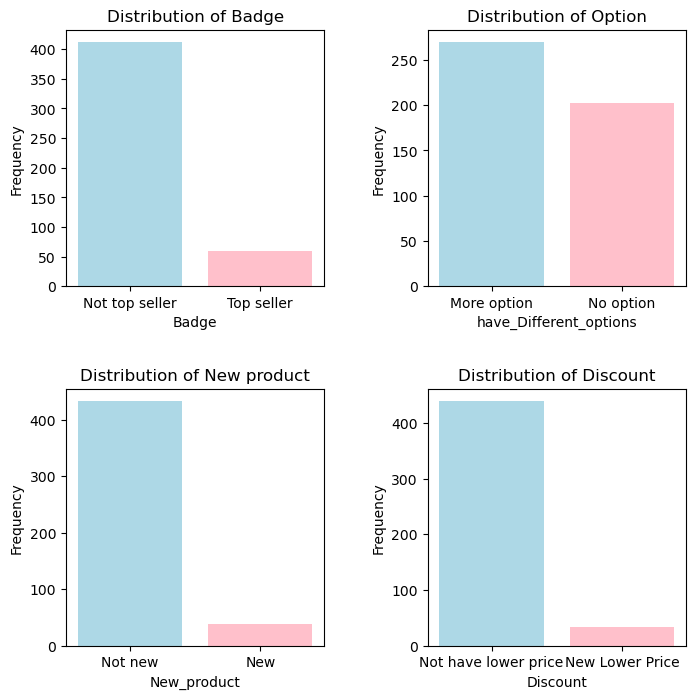

Not top seller    412
Top seller         60
Name: Badge, dtype: int64
---------------
More option    270
No option      202
Name: have_Different_options, dtype: int64
---------------
Not new    433
New         39
Name: New_product, dtype: int64
---------------
Not have lower price    439
New Lower Price          33
Name: Discount, dtype: int64


In [51]:
#visualizing Badge , have_Different_options , New_product , Discount by bar chart 
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# plot the first bar chart in the first subplot
counts1 = ikea['Badge'].value_counts()
colors1 = ['lightblue', 'pink']
axs[0, 0].bar(counts1.index, counts1.values, color=colors1[:len(counts1)])
axs[0,0].set_xlabel('Badge')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Distribution of Badge')
axs[0, 0].set_xticks(counts1.index)
axs[0, 0].set_xticklabels(counts1.index)

# plot the second bar chart in the second subplot
counts2 = ikea['have_Different_options'].value_counts()
colors2 = ['lightblue', 'pink']
axs[0, 1].bar(counts2.index, counts2.values, color=colors2[:len(counts2)])
axs[0, 1].set_xlabel('have_Different_options')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Distribution of Option')
axs[0, 1].set_xticks(counts2.index)
axs[0, 1].set_xticklabels(counts2.index)

# plot the third bar chart in the third subplot
counts3 = ikea['New_product'].value_counts()
colors3 = ['lightblue', 'pink']
axs[1, 0].bar(counts3.index, counts3.values, color=colors3[:len(counts3)])
axs[1, 0].set_xlabel('New_product')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Distribution of New product')
axs[1, 0].set_xticks(counts3.index)
axs[1, 0].set_xticklabels(counts3.index)

# plot the fourth bar chart in the fourth subplot
counts4 = ikea['Discount'].value_counts()
colors4 = ['lightblue', 'pink']
axs[1, 1].bar(counts4.index, counts4.values, color=colors4[:len(counts4)])
axs[1, 1].set_xlabel('Discount')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title('Distribution of Discount')
axs[1, 1].set_xticks(counts4.index)
axs[1, 1].set_xticklabels(counts4.index)

# adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# display the plot
plt.show()

print(counts1)
print('-'*15)
print(counts2)
print('-'*15)
print(counts3)
print('-'*15)
print(counts4)



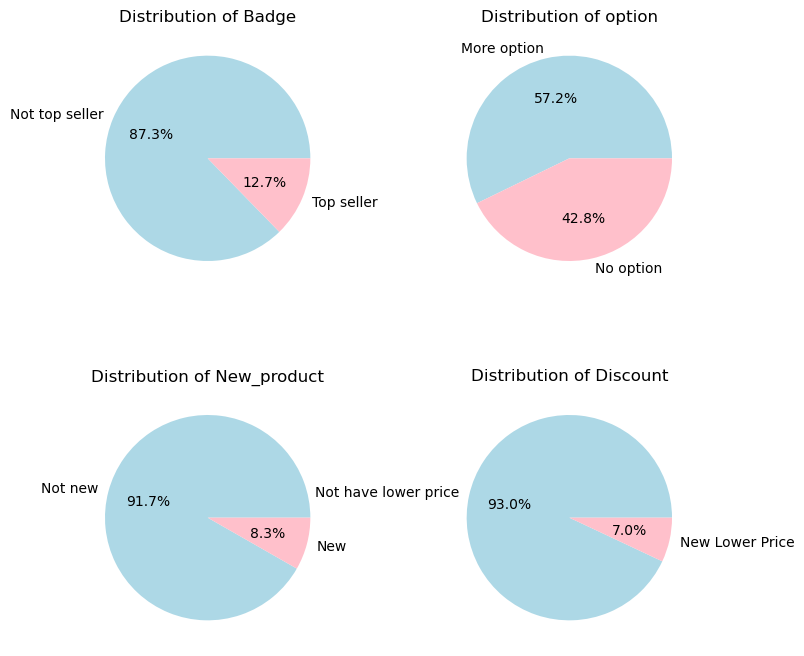

In [52]:
#visualizing Badge , have_Different_options , New_product , Discount by pie chart

fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# plot the first pie chart in the first subplot
counts1 = ikea['Badge'].value_counts()
colors1 = ['lightblue', 'pink']
axs[0, 0].pie(counts1.values, labels=counts1.index, colors=colors1, autopct='%1.1f%%')
axs[0, 0].set_title('Distribution of Badge')

# plot the second pie chart in the second subplot
counts2 = ikea['have_Different_options'].value_counts()
colors2 = ['lightblue', 'pink']
axs[0, 1].pie(counts2.values, labels=counts2.index, colors=colors2, autopct='%1.1f%%')
axs[0, 1].set_title('Distribution of option')

# plot the third pie chart in the third subplot
counts3 = ikea['New_product'].value_counts()
colors3 = ['lightblue', 'pink']
axs[1, 0].pie(counts3.values, labels=counts3.index, colors=colors3, autopct='%1.1f%%')
axs[1, 0].set_title('Distribution of New_product')

# plot the fourth pie chart in the fourth subplot
counts4 = ikea['Discount'].value_counts()
colors4 = ['lightblue', 'pink']
axs[1, 1].pie(counts4.values, labels=counts4.index, colors=colors4, autopct='%1.1f%%')
axs[1, 1].set_title('Distribution of Discount')

# adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# display the plot
plt.show()




###### from the graphs above for Categorical feature  ,
- There is a big difference between ("Top seller" , "Not top seller") and ("New lower price" , "Not have lower price") and ("New" , "Not new") tags , and this is normal, because the number of IKEA products is very large, so the presence of new ,discounted or top seller products will be a small number compared to the huge number of products in the IKEA store. 

- More than half of the products in IKEA have different colors for the same product , this is what we deduce from the options graph.

- This is not the season for discounts, because the percentage of discounted products is very few.

- There are a few new products, and this percentage is normal because we compare it to the total products during all periods

Not top seller    412
Top seller         60
Name: Badge, dtype: int64


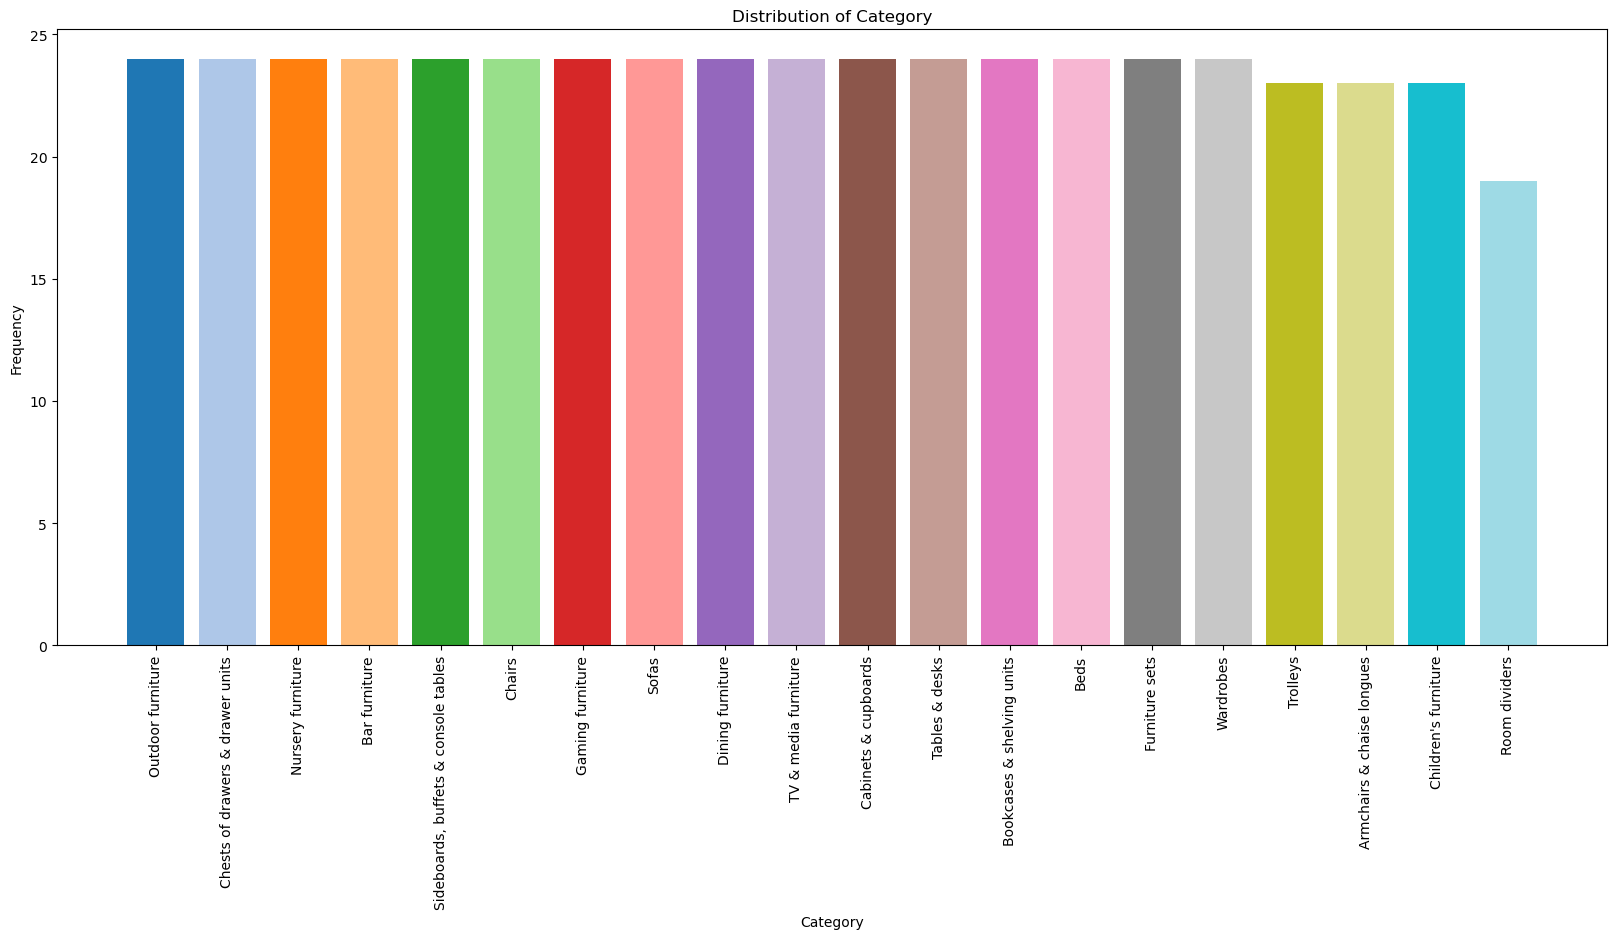

In [53]:
#visualization by bar chart 
fig, ax = plt.subplots(figsize=(20, 8))

# generate a list of colors from a colormap
num_categories = len(ikea['Category'].unique())
cmap = plt.get_cmap('tab20')
colors = cmap(np.linspace(0, 1, num_categories))

# plot the first bar chart in the first subplot
counts_Cat = ikea['Category'].value_counts()
ax.bar(counts_Cat.index, counts_Cat.values , color = colors)
ax.set_xlabel('Category')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Category')
ax.set_xticks(counts_Cat.index)
ax.set_xticklabels(counts_Cat.index)
plt.xticks(rotation=90)
print(counts1)


plt.show()

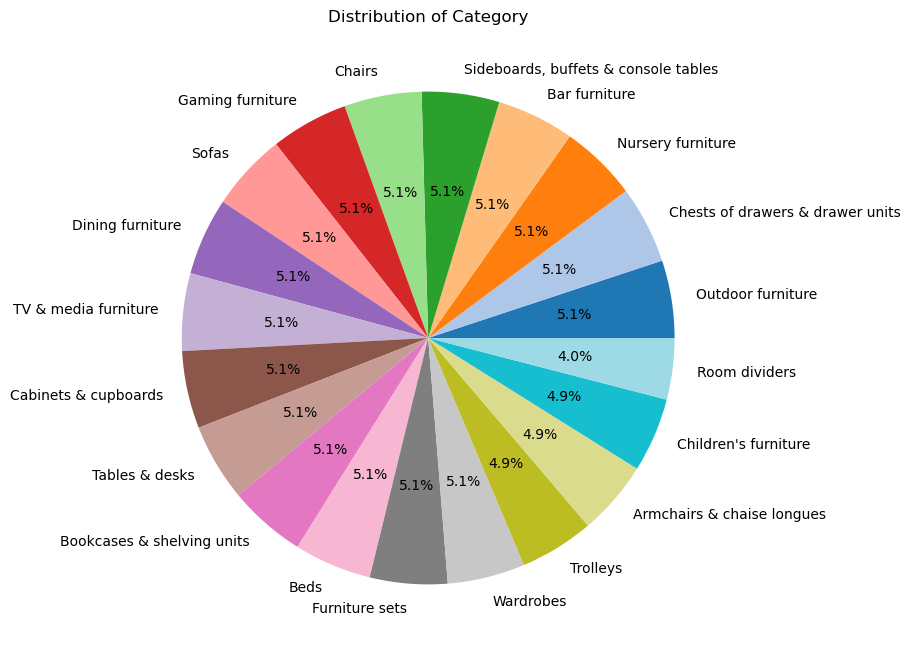

In [54]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.pie(counts_Cat.values, labels=counts_Cat.index, colors=colors, autopct='%1.1f%%')
ax.set_title('Distribution of Category')

plt.show()


###### The above graphs, shows the different category in our dataset and there number (count) , and the space it occupies
###### So ,we can notice that the number of products for each category is similar or nearly the same between (4% to 5.1%)

###### * about Product_type , we have a very large number of typs =201 , so the graph of Product_type will not be clear, Instead, we represented each category for what product_type it contained, and it's count in next section.

###### visualizing Numerical feature

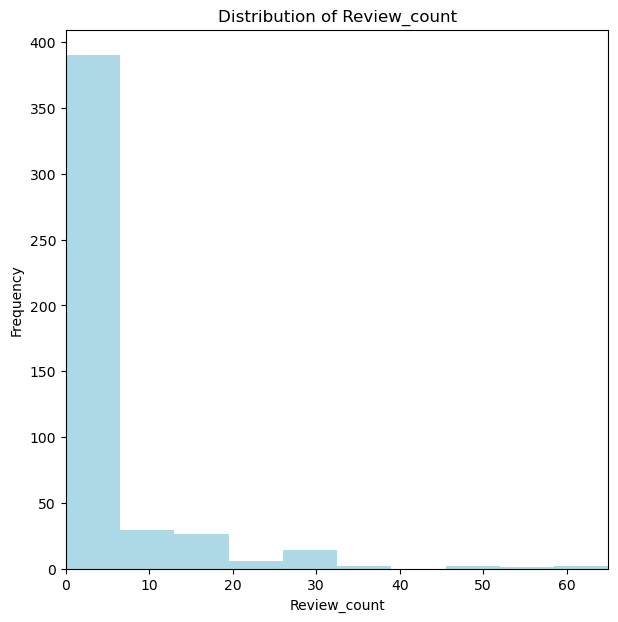

In [55]:
#visualization by Histogram for Review_count 
fig, ax = plt.subplots(figsize =(7, 7))

ax.hist(ikea['Review_count'] , bins =10 , color ='lightblue')
ax.set_xlabel('Review_count')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Review_count')
ax.set_xlim([0,65])
plt.show()

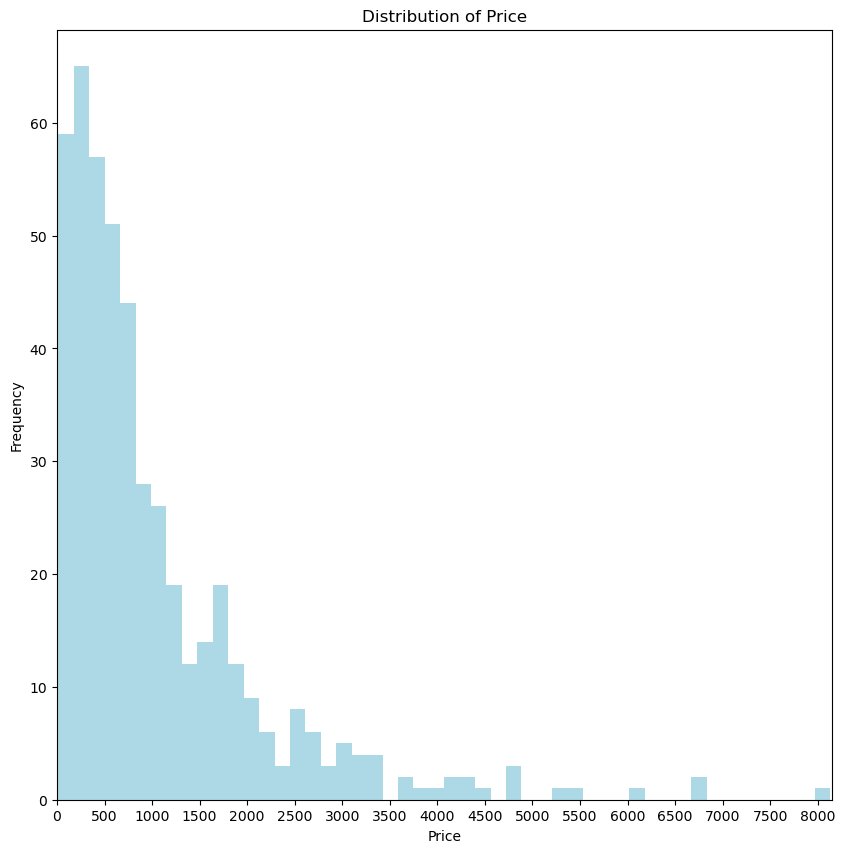

In [56]:
#visualization by Histogram for Price 
fig, ax = plt.subplots(figsize =(10, 10))

ax.hist(ikea['Price'] , bins =50 , color ='lightblue')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Price')
ax.set_xlim([0,8150])
ax.set_xticks(range(0 , 8150 , 500))
plt.show()

##### From the graphs above for Categorical feature , 
- About Review_count ,we can notice that most of the products get a number (0 to 7) of reviews, and there is also a good number that gets a number (10 to 30) of reviews, as well as a few at (45 to 60), and the fact that few products are characterized by a large number of reviews compared to the rest, makes this a reason to generate some curiosity and form possible hypotheses that we will study and evaluate.

- About Price , we can notice that most of the IKEA products have a price range between (1 to 1000), while there are a few products whose price is high (2000 to 8000), and here we can be or test the hypothesis of some "where IKEA is one of the stores that sells products Well priced within most people's reach", but this hypothesis should definitely be tested further.

### 2.3 Non-Graphical, multivariate

##### Do all the necessary feature engineering tasks to prepare the dataset for ML algorithm and other statics 

In [57]:
# take a copy from original dataset to perform some Operation on it
ikea_new = ikea.copy()
ikea_new.head()

,Name,Category,Product_type,Review_count,Price,Badge,have_Different_options,New_product,Discount
0,LÄTT,Children's furniture,Children's table with 2 chairs,17,199,Top seller,No option,Not new,New Lower Price
1,MAMMUT,Children's furniture,"Children's table,",6,189,Not top seller,No option,Not new,Not have lower price
2,MAMMUT,Children's furniture,"Children's table,",0,115,Not top seller,No option,Not new,Not have lower price
3,IKEA PS LÖMSK,Children's furniture,Swivel armchair,1,449,Not top seller,No option,Not new,Not have lower price
4,SMÅSTAD,Children's furniture,"Wardrobe with pull-out unit,",0,1223,Not top seller,No option,Not new,Not have lower price


##### Columns transformation

In [58]:
ikea_new['Badge'].replace(['Top seller','Not top seller'],[1,0],inplace=True)
ikea_new['have_Different_options'].replace(['More option','No option'],[1,0],inplace=True)
ikea_new['New_product'].replace(['New','Not new'],[1,0],inplace=True)
ikea_new['Discount'].replace(['New Lower Price','Not have lower price'],[1,0],inplace=True)

In [59]:
# decode category in copy dataframe to see if there is a relation
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
ikea_new['Category'] = le.fit_transform(ikea_new['Category'])
ikea_new.head()

,Name,Category,Product_type,Review_count,Price,Badge,have_Different_options,New_product,Discount
0,LÄTT,7,Children's table with 2 chairs,17,199,1,0,0,1
1,MAMMUT,7,"Children's table,",6,189,0,0,0,0
2,MAMMUT,7,"Children's table,",0,115,0,0,0,0
3,IKEA PS LÖMSK,7,Swivel armchair,1,449,0,0,0,0
4,SMÅSTAD,7,"Wardrobe with pull-out unit,",0,1223,0,0,0,0


##### After transformation :
- Badge : 1("Top seller") - 0("Not top seller")
- have_Different_options: 1("More option") - 0("No option")
- New product: 1("New") - 0("Not new") 
- Discount: 1("New Lower Price")  - 0("Not have lower price")
- Category: each category will have a unique number.

##### In Non-Graphical , multivariate we will use correlation since many prediction algorithms rely on the fact that there is some sort of relationship between the feature


##### correlation used to generate hypotheses but we need to use more machine learning algorithms to solidify these assumptions and hypotheses 

In [60]:
#find correlation coefficient between features 
x= ikea_new.corr()
x

,Category,Review_count,Price,Badge,have_Different_options,New_product,Discount
Category,1.000000,0.080039,0.172158,0.008571,-0.054883,-0.005790,0.074089
Review_count,0.080039,1.000000,-0.235854,0.383908,0.070206,-0.113116,0.170611
Price,0.172158,-0.235854,1.000000,-0.093950,0.279827,-0.087273,0.174527
Badge,0.008571,0.383908,-0.093950,1.000000,0.008715,-0.091427,0.244557
have_Different_options,-0.054883,0.070206,0.279827,0.008715,1.000000,0.026295,0.035647
New_product,-0.005790,-0.113116,-0.087273,-0.091427,0.026295,1.000000,-0.082284
Discount,0.074089,0.170611,0.174527,0.244557,0.035647,-0.082284,1.000000


<AxesSubplot:>

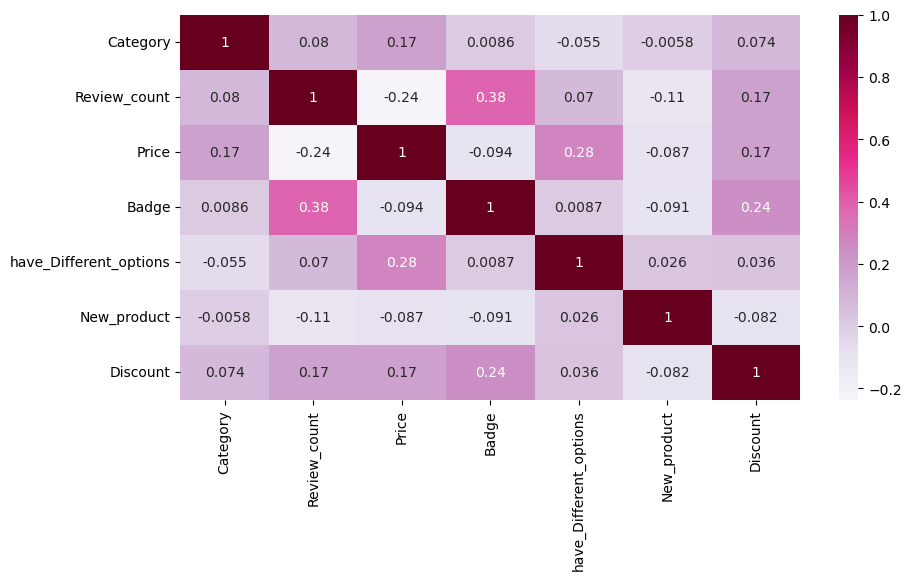

In [61]:
# virtualisation of Correlation coefficient 
plt.figure(figsize=(10,5))
sns.heatmap(ikea_new.corr(),cmap="PuRd", annot=True)

#####  after calculating the correlation:
##### we can observe that the highies positive correlation is with the target class"Badge" and  Review_count although it is weak since it's under 0.5 , and it's equal to 0.38  

##### we can observe that the highies negative correlation between features is Review_count and price although it is weak since it's under | 0.5| , and it's equal to |-0.24| .

###### about Name , product_type 
###### In our data set, when we checked the unique values, we found that the name is not unique, but in fact the name is unique, as it is possible for the same product and the same category and type, but the prices and tags (badge , New_product , discount , have_diffrent_option) in it differ, and this is due to the fact that some of these products are similar in The name has different measurements and therefore different prices , etc. Therefore, when searching for duplication , there were no duplicates observation, and because the measurements did not matter to us when we collected the data, therefore these names are considered unique, and also we cannot conclude from them anything that is useful to us in the model later.

###### As for the type, it is considered a sub-type of the category feature, so we included it in the larger group = category

###### Therefore, we will not convert these feature or find correlation of them, and they will be dropped in the next stages "modeling"

In [73]:
#correlation coefficients between Badge attribute against all of the other features
Target_corr =ikea_new.corr()[['Badge']].sort_values(by='Badge',ascending=False)
Target_corr

,Badge
Badge,1.000000
Review_count,0.383908
Discount,0.244557
have_Different_options,0.008715
Category,0.008571
New_product,-0.091427
Price,-0.093950


### 2.4 Graphical, multivariate

#### 2.4.1 In this section we will show the relationship between some column and the target class -Badge- to see if there is any relation that can be usful for our analysis

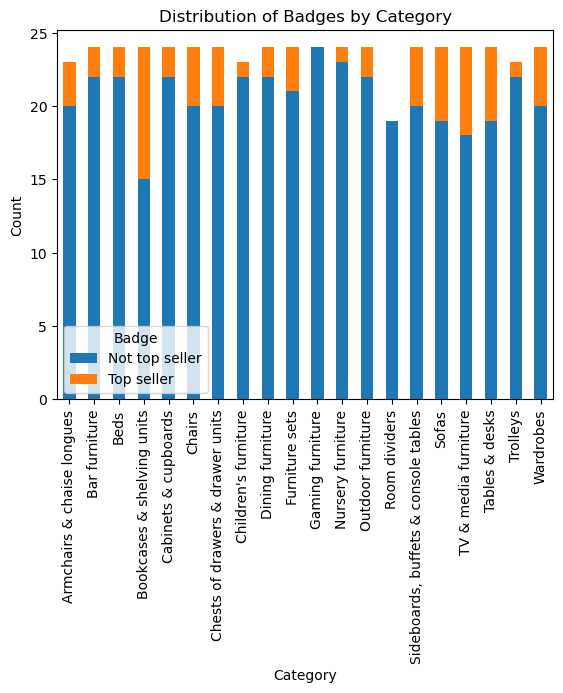

In [74]:
counts = ikea.groupby(['Category', 'Badge']).size().reset_index(name='count')
# create a pivot table to reshape the data
pivot = counts.pivot(index='Category', columns='Badge', values='count')
pivot.plot(kind='bar', stacked=True)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Badges by Category')

# show the chart
plt.show()


#####  In the above graph,
###### It's shows us the number of Top seller products compared to the Not top seller products and vice versa for each category. As (TV & media furniture, Bookcases & shelving units , Sideboards, buffets & console tables , Tables & desks ) are among the categories in which the number of Top seller products is greater compared to the rest, and here we can conclude that Storage & organisation products in general may be preferred by buyers and among the Top seller.


<Figure size 1000x500 with 0 Axes>

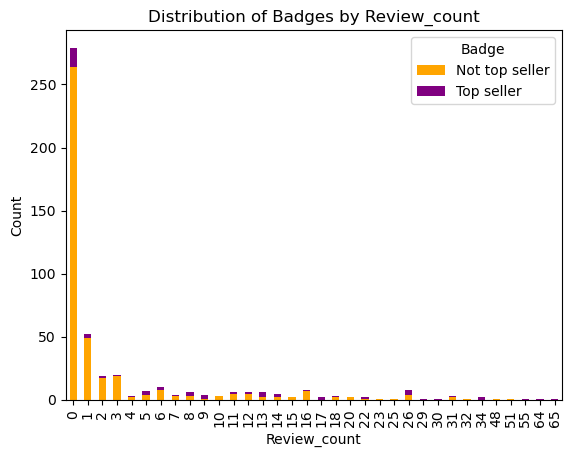

In [75]:
counts = ikea.groupby(['Review_count', 'Badge']).size().reset_index(name='count')
# create a pivot table to reshape the data
pivot = counts.pivot(index='Review_count', columns='Badge', values='count')
plt.figure(figsize=(10,5))
pivot.plot(kind='bar', stacked=True , color=['orange' , 'purple'])
plt.xlabel('Review_count')
plt.ylabel('Count')
plt.title('Distribution of Badges by Review_count')

# show the chart
plt.show()



##### In the above graph , 
###### We can notice that when the number of Review_count increases, the count that the product will be Top seller is greater than that of not being Top seller, such as what happened with (13, 8, 17 ,22, 26 ,29 ,30 ,34 ,55 ,64 ,65)

/Users/linaalrabeah/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


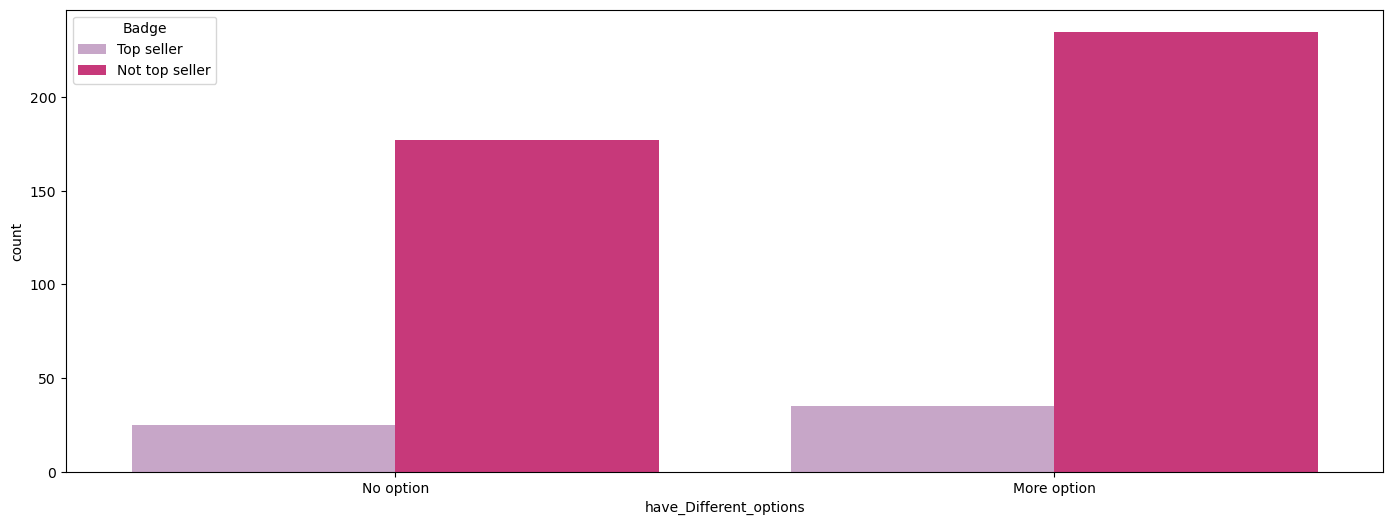

In [76]:
plt.figure(figsize = (17, 6))
sns.countplot('have_Different_options', hue = 'Badge', data = ikea, palette='PuRd')
plt.show()

##### from the graph above , Having  more option will still not make Product Top seller , but i it's better than No option 

/Users/linaalrabeah/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


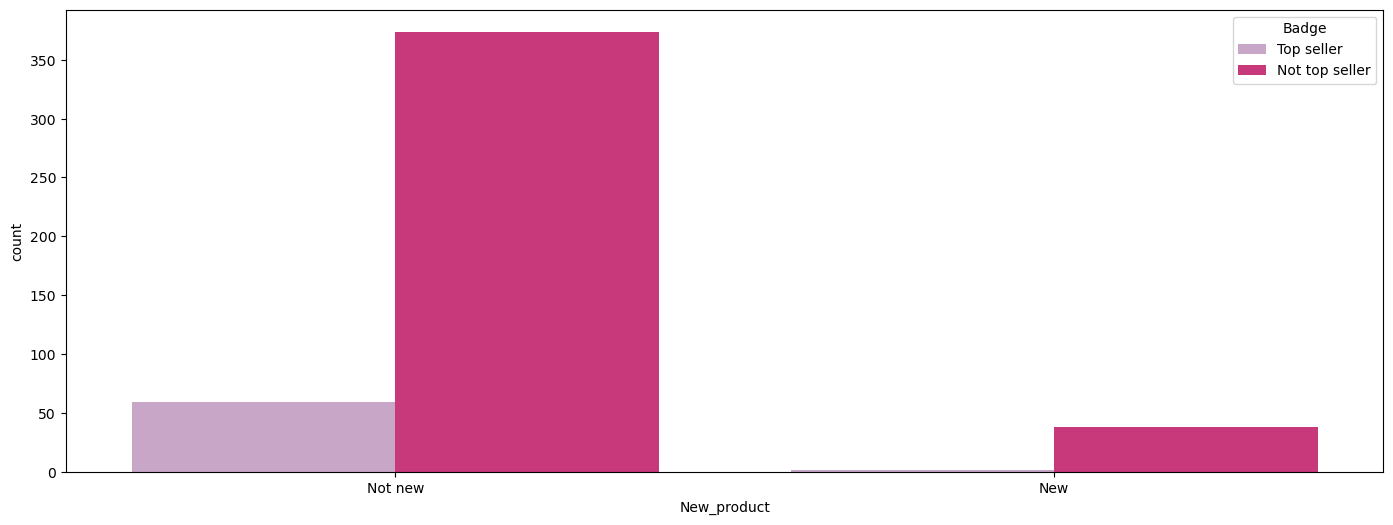

In [77]:
plt.figure(figsize = (17, 6))
sns.countplot('New_product', hue = 'Badge', data = ikea, palette='PuRd')
plt.show()

#### From graph above , we can observe that if the product is new it may not be top seller , but if it is "not new", it can be one of the best sellers, even if the percentage is small

/Users/linaalrabeah/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


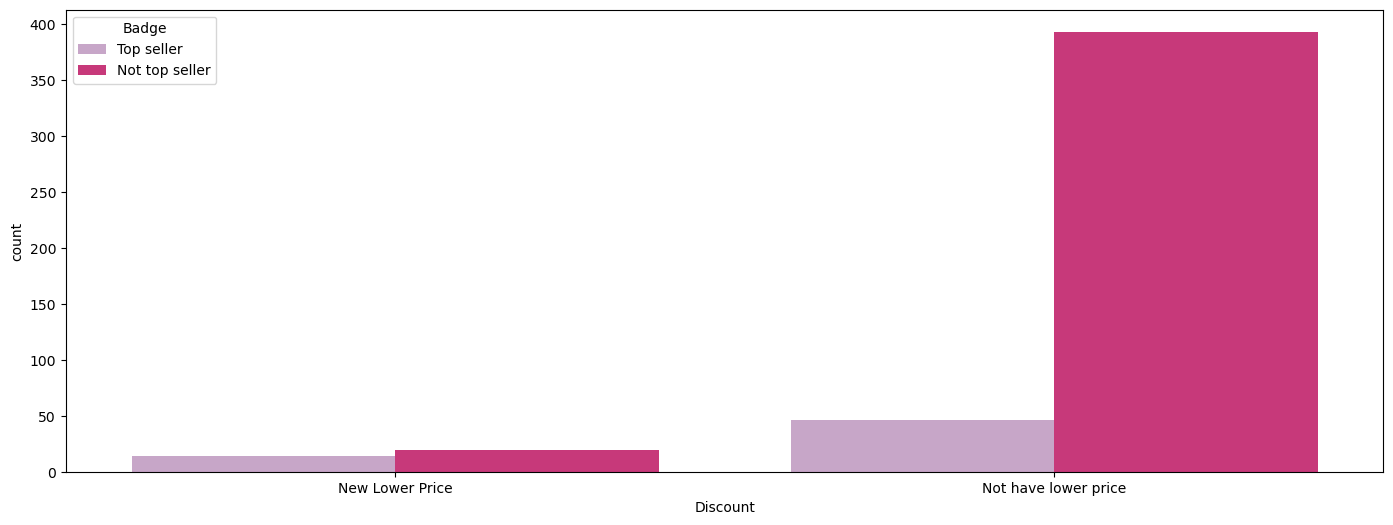

In [78]:
plt.figure(figsize = (17, 6))
sns.countplot('Discount', hue = 'Badge', data = ikea, palette='PuRd')
plt.show()

#### From graph above , we can observe that if the product have new lower price it has a good rate of being a Top seller "More than half of the products classified as discounted are top sellers" , but if he wasn't discounted, he didn't have a good chance compared to the other one.

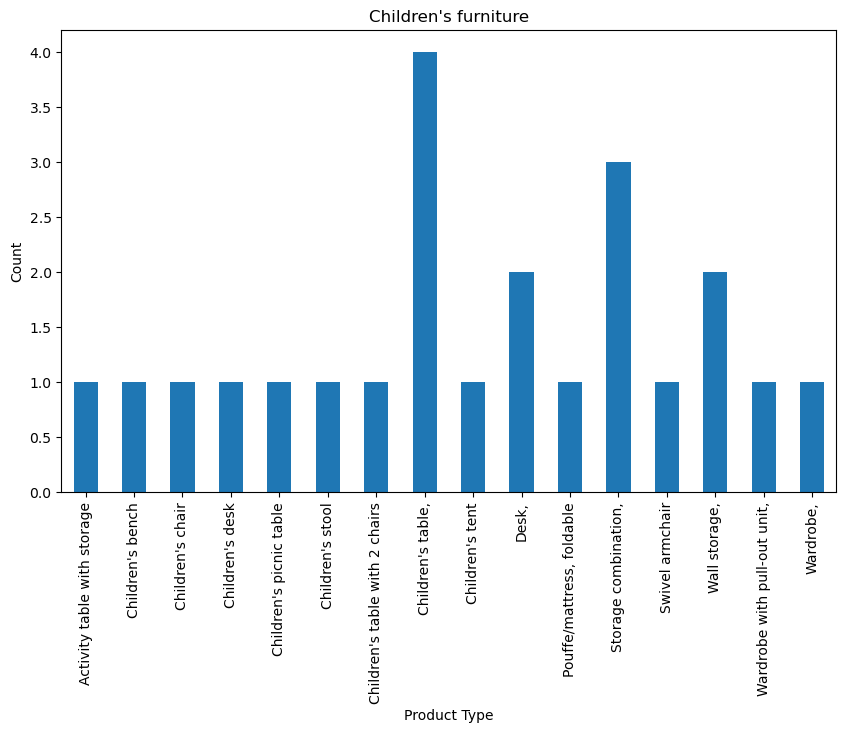

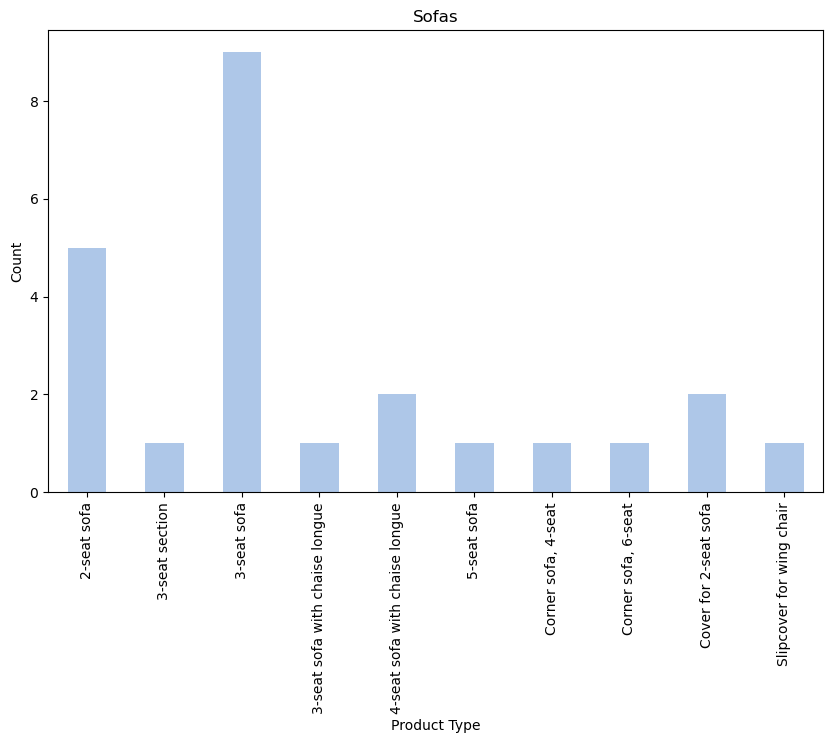

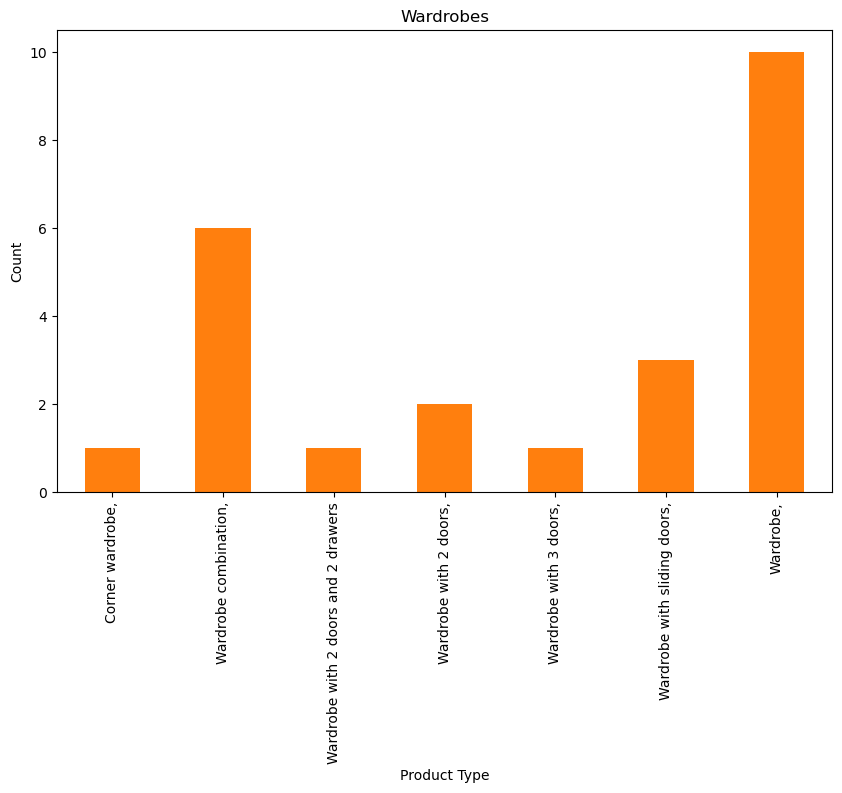

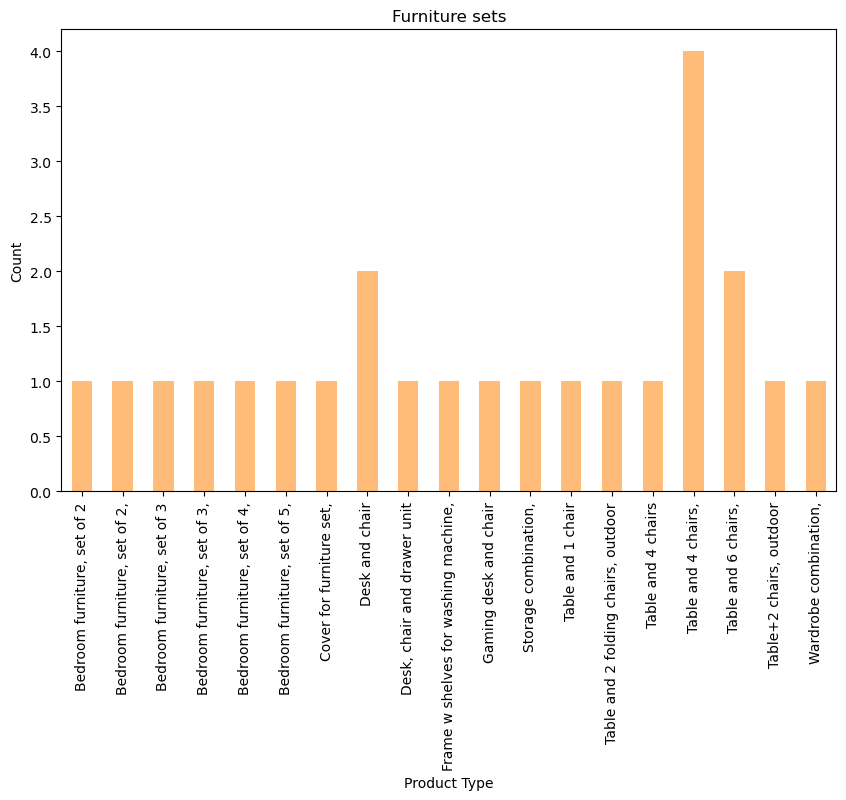

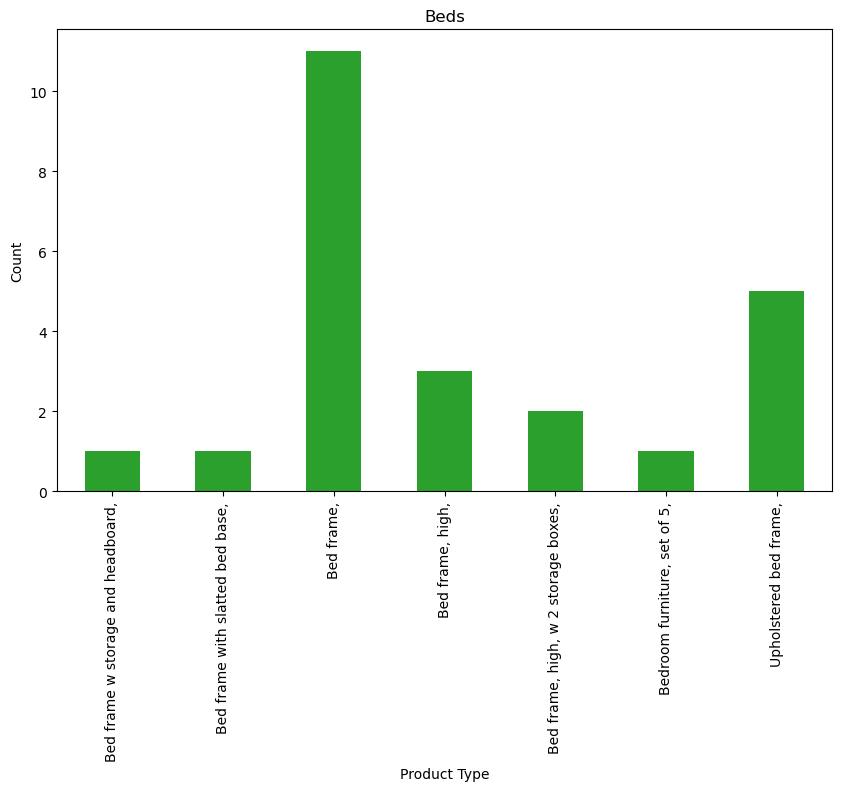

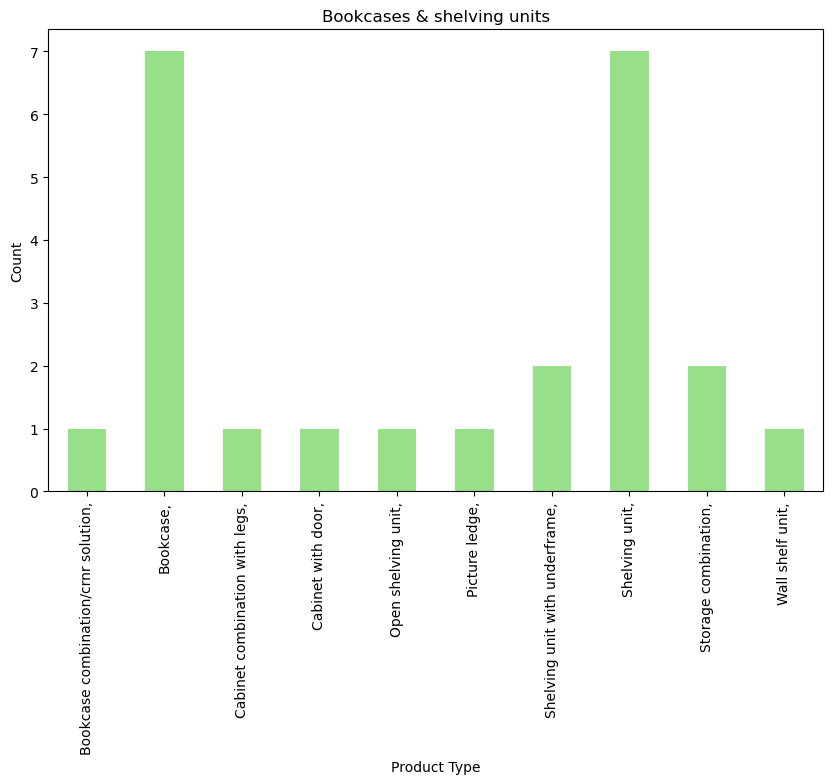

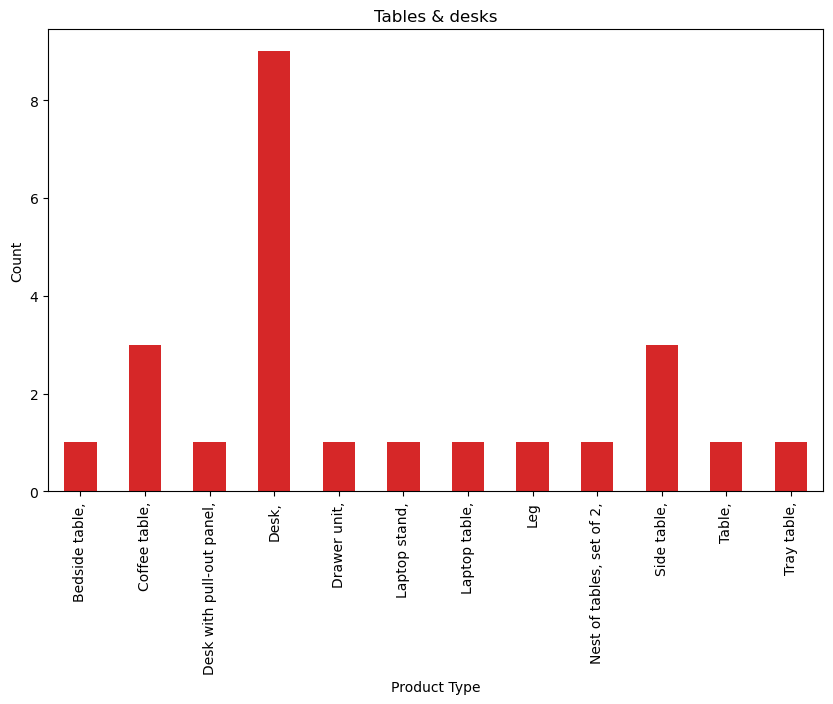

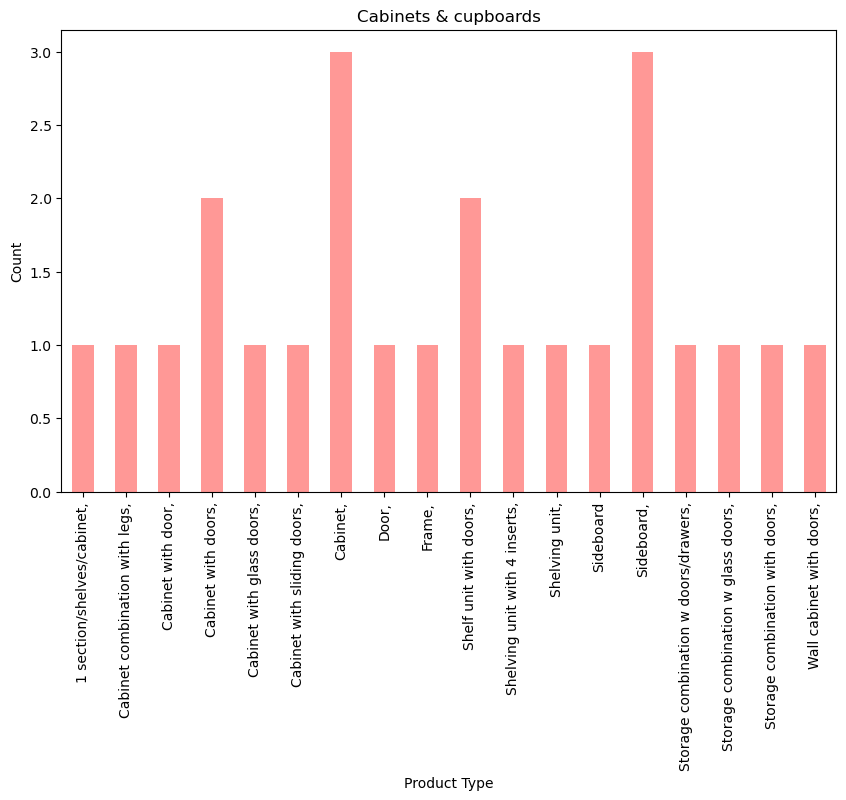

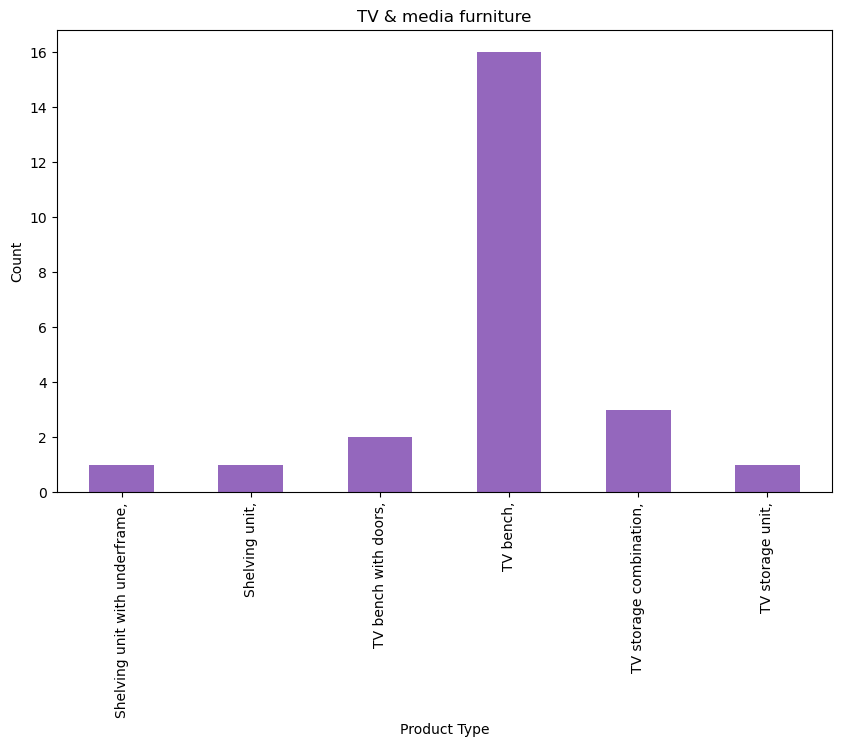

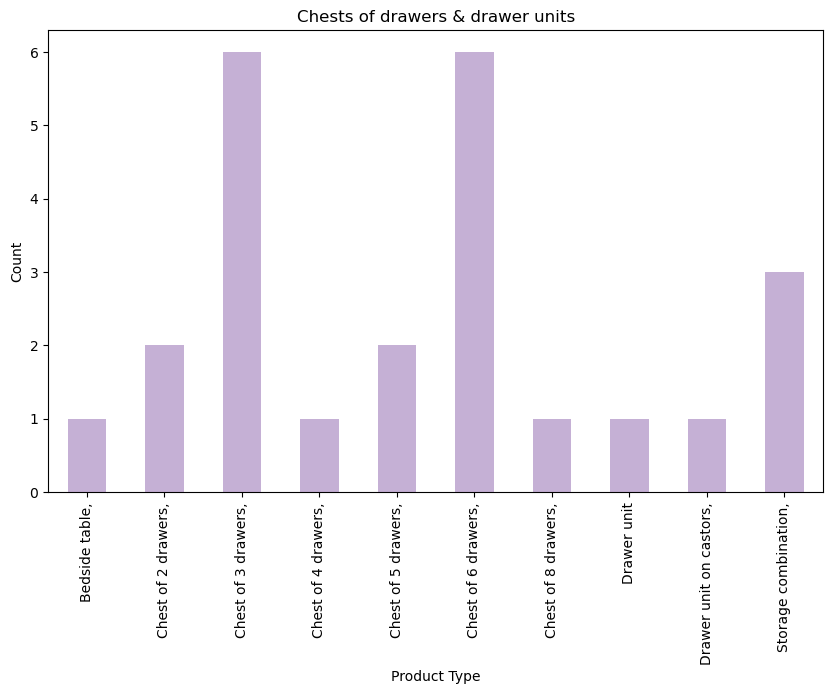

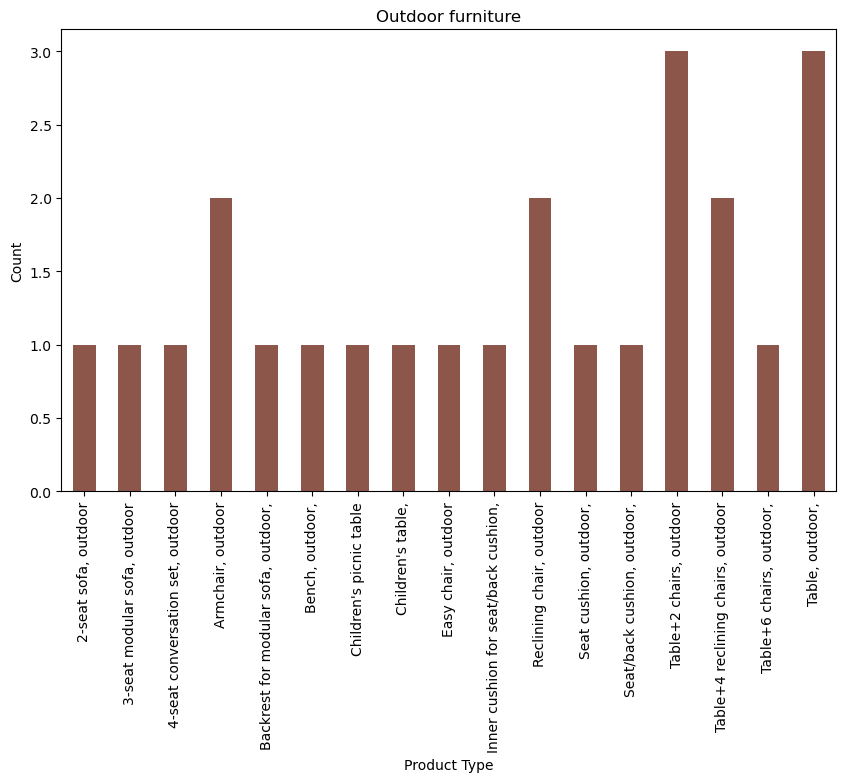

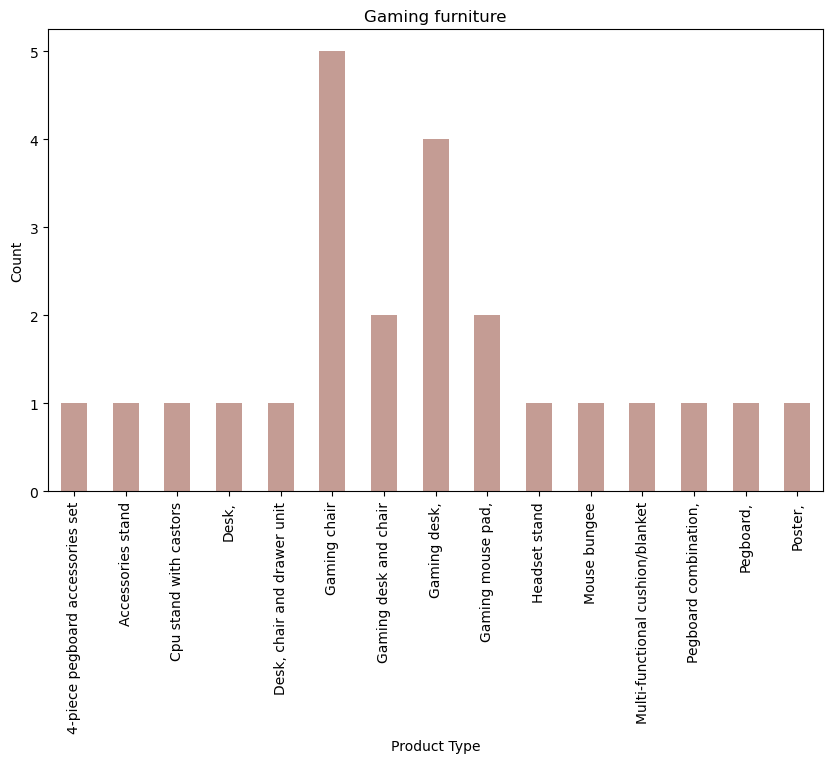

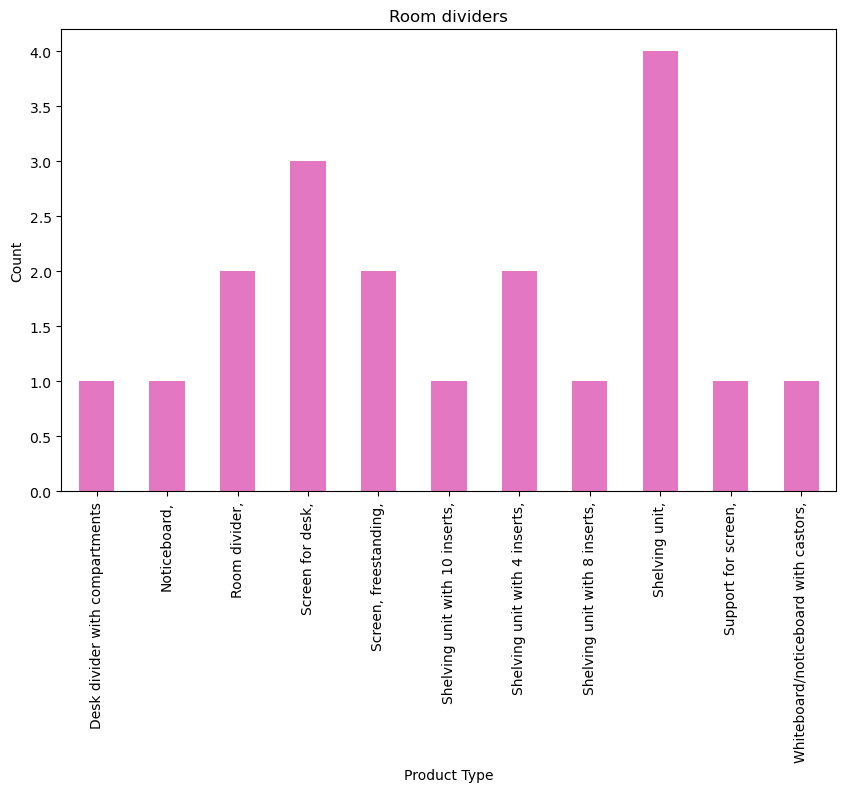

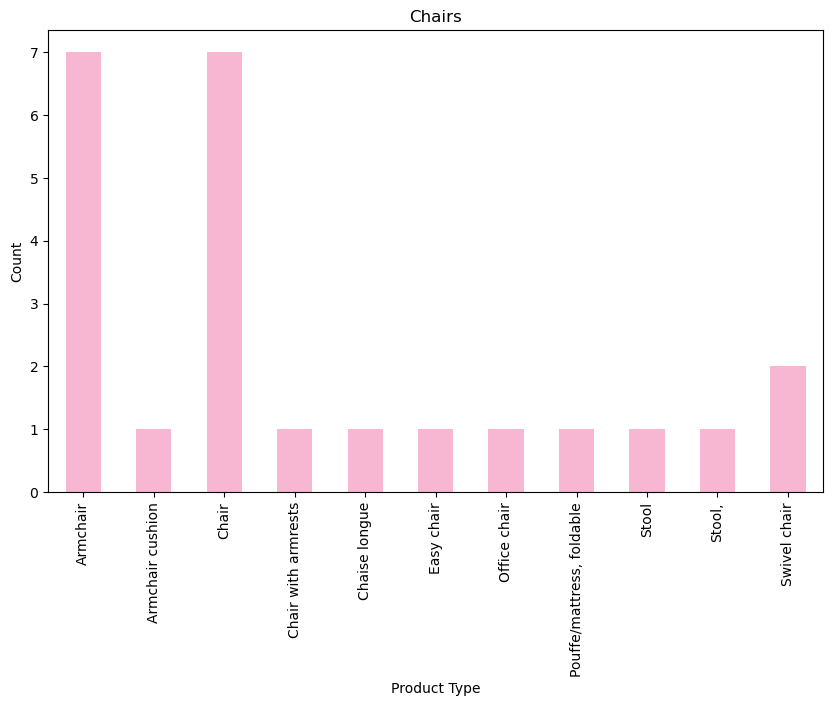

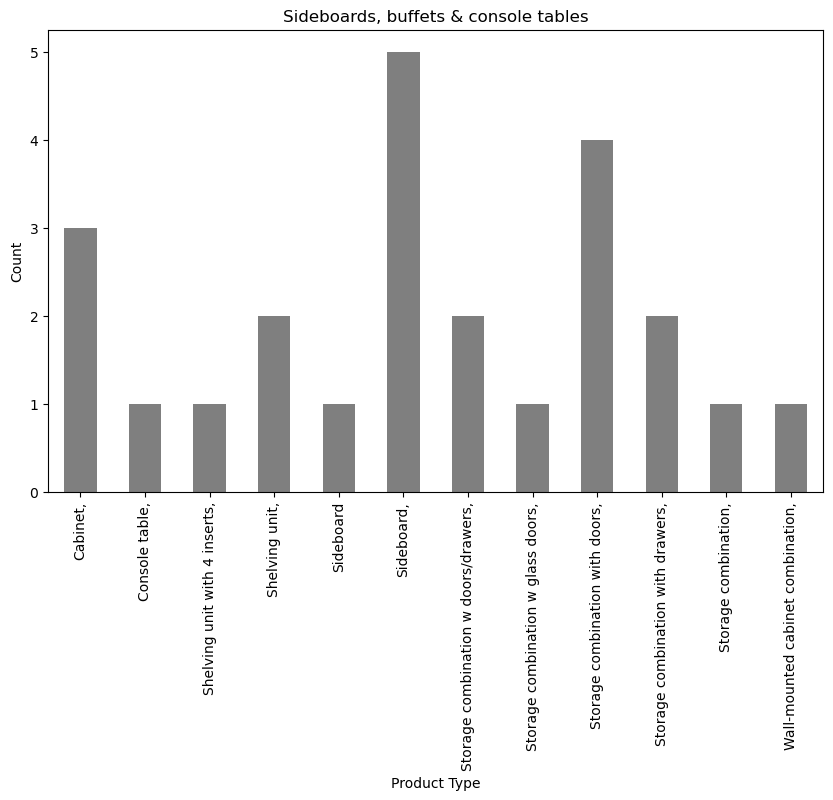

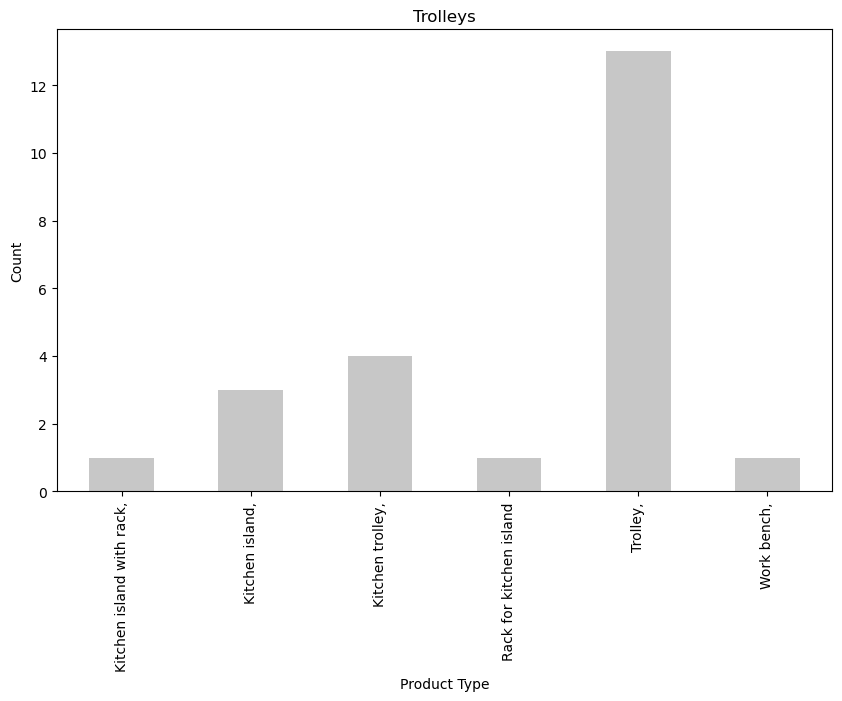

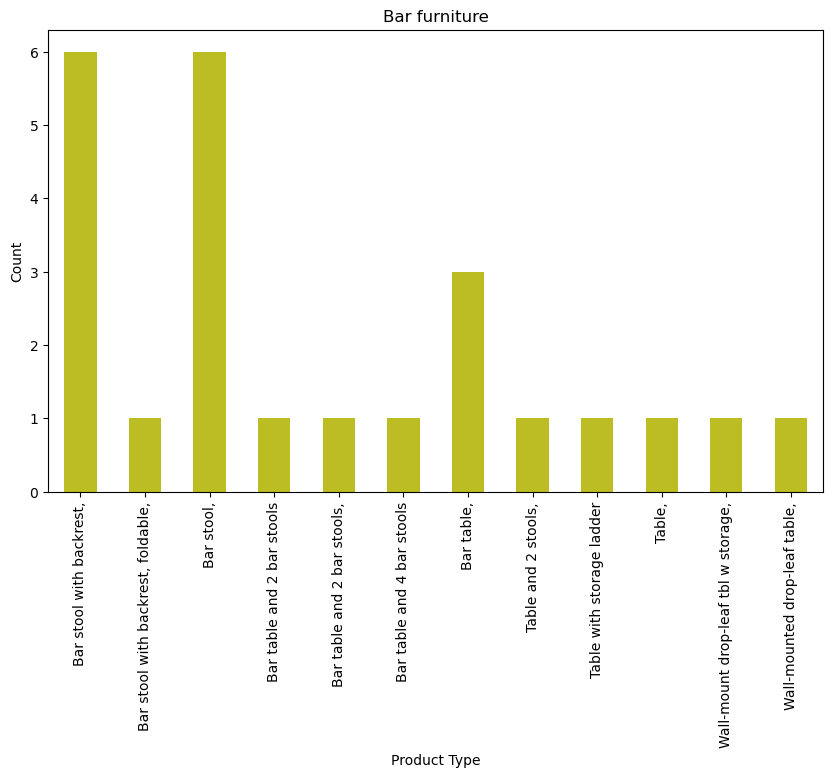

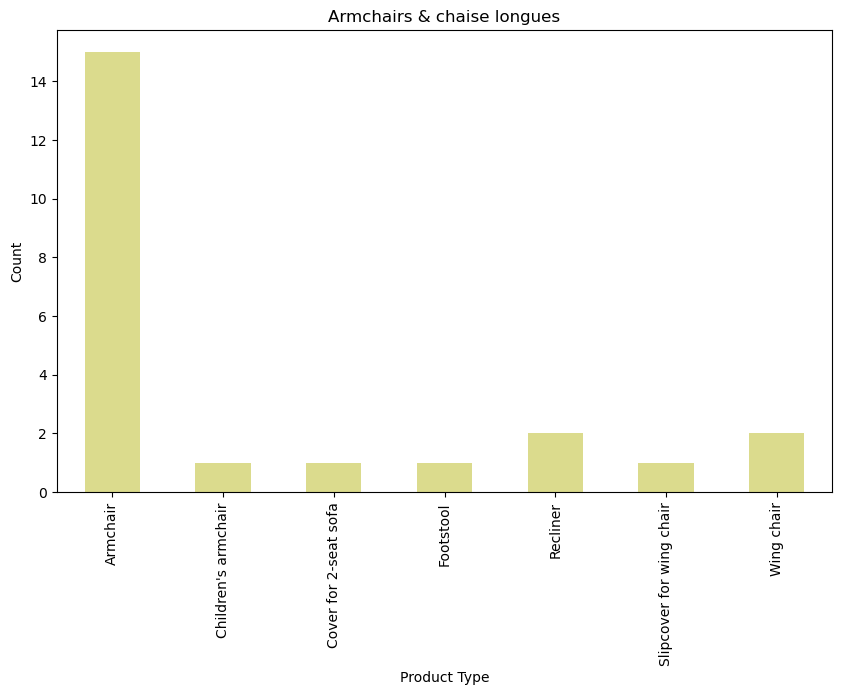

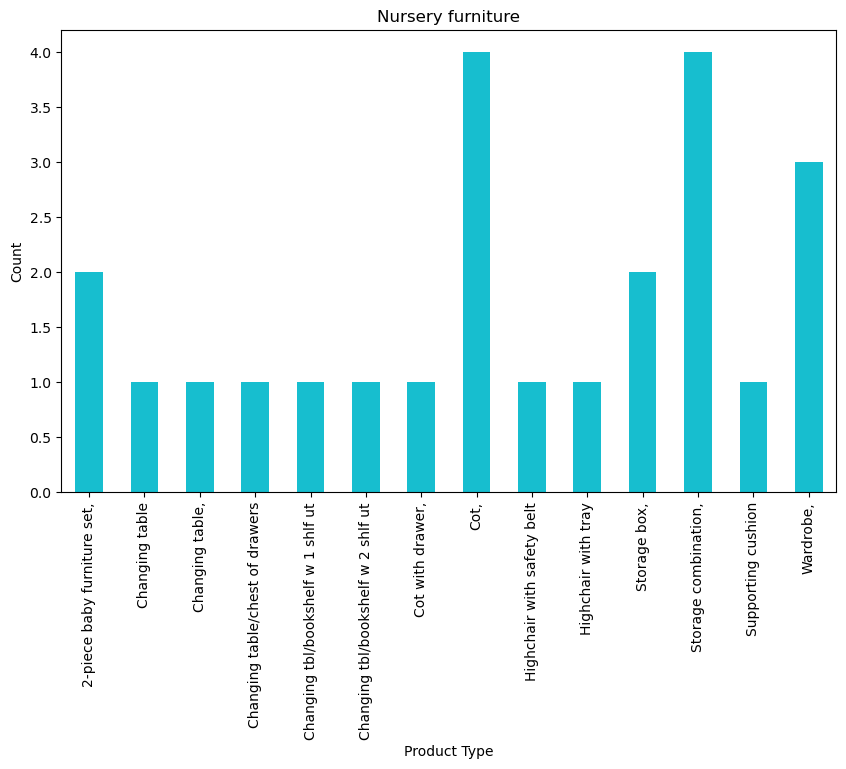

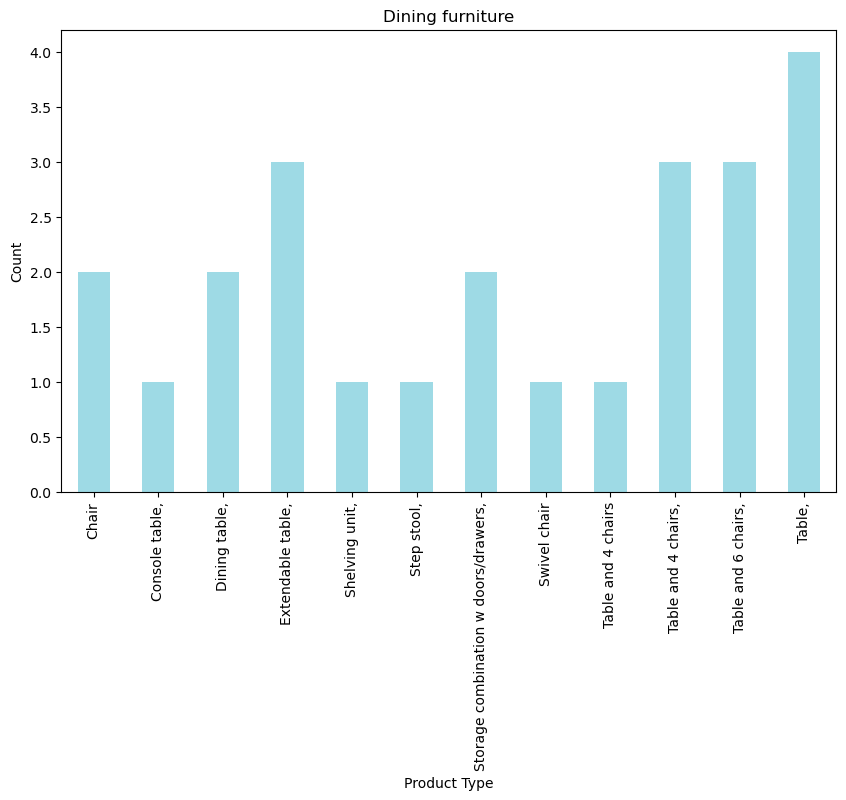

In [79]:
# Get the list of categories
categories = ikea['Category'].unique()

# Generate a list of colors using a color map
num_categories = len(categories)
cmap = plt.get_cmap('tab20')
colors = cmap(np.linspace(0, 1, num_categories))

# Create a bar chart for each category
for i, category in enumerate(categories):
    # Filter the dataframe by category
    filtered_df = ikea[ikea['Category'] == category]
    if filtered_df.empty:
        continue
    # Group the filtered dataframe by product type and count the number of occurrences
    grouped_df = filtered_df.groupby('Product_type').size()
    
    # Create the bar chart and assign colors to each column
    fig, ax = plt.subplots(figsize=(10, 6))
    grouped_df.plot(kind='bar', ax=ax, color=colors[i])
    ax.set_xlabel('Product Type')
    ax.set_ylabel('Count')
    ax.set_title(category)
    plt.show()



###### In the above graphs ,
###### We plot each category with it's own product types  , so we can find each product type and which category it's belong to and the count of this type in this category.

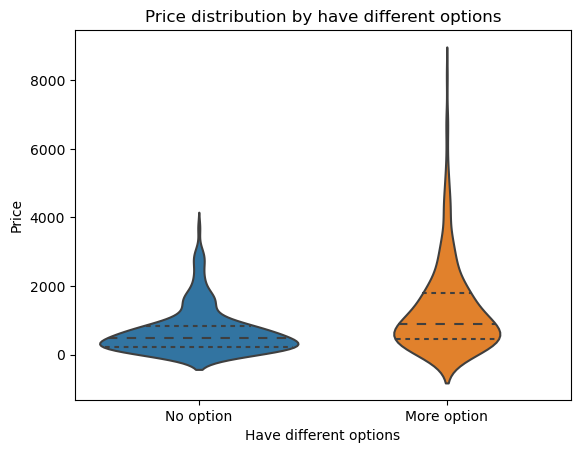

In [85]:

sns.violinplot(x='have_Different_options', y='Price', data=ikea, inner='quartile')
plt.xlabel('Have different options')
plt.ylabel('Price')
plt.title('Price distribution by have different options')
plt.show()

##### From above graph , 
##### We can notice that when the price is low (), there are many products that have No more options, while when the price is high, we can find more options ,With regard to the presence of options, they are present at all prices, but there are many No more options if the price is low

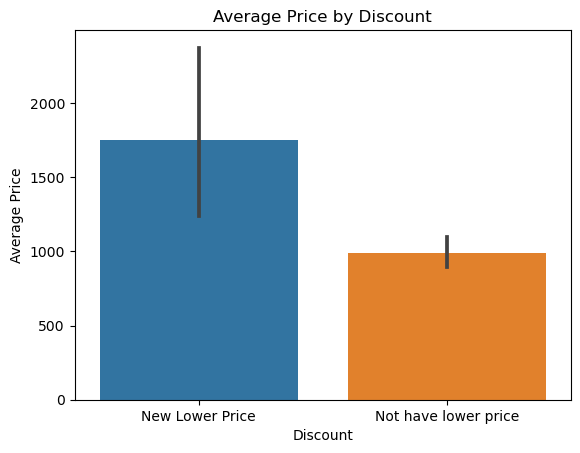

In [80]:
# create a bar chart of the average price for each discount category
sns.barplot(x='Discount', y='Price', data=ikea, estimator=lambda x: sum(x) / len(x))

# add labels and title
plt.xlabel('Discount')
plt.ylabel('Average Price')
plt.title('Average Price by Discount')

# show the chart
plt.show()

##### In the graph above , 
###### it's means that the majority of products with a lower price discount are priced between 0 and 1750, while the majority of products without a lower price discount are priced between 0 and 1000 , However, the difference in the price range between the two categories suggests that the products with a lower price discount may be more likely to have higher prices than products without a discount and this could be due to a number of factors, such as the quality or popularity of the products, or the marketing strategy of the retailer.


# Classification models


###### First we will drop the non numeric columns ( Name,Product_type ) because they have a large number of unique values which can lead to the curse of dimensionality, Also , as we mentioned earlier, they are not useful in the model, or they are parts included by other features.
###### so we need to drop it to prepair our data for build the classification models. 

In [71]:
ikea_new=ikea_new.drop(['Name','Product_type'],axis=1)

ikea_new

,Category,Review_count,Price,Badge,have_Different_options,New_product,Discount
0,7,17,199,1,0,0,1
1,7,6,189,0,0,0,0
2,7,0,115,0,0,0,0
3,7,1,449,0,0,0,0
4,7,0,1223,0,0,0,0
...,...,...,...,...,...,...,...
467,8,2,145,0,0,0,0
468,8,3,1495,0,1,0,0
469,8,1,1445,0,1,0,0
470,8,0,699,0,1,0,0


### Splitting the data into training and testing sets :

In [72]:
X = ikea_new.drop('Badge',axis=1)
y = ikea_new['Badge']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
print (X_train.shape,X_test.shape,y_train.shape, y_test.shape)

(354, 6) (118, 6) (354,) (118,)


In [300]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2) #80% training, 20% testing
print (X_train.shape,X_test.shape,y_train.shape, y_test.shape)

(377, 6) (95, 6) (377,) (95,)


### Multi-class classification using 3 models:

* We used cross-validation: applying each model n times for different training and testing
* We used a version of k-fold cross-validation that preserves the imbalanced class distribution in each fold.
 * It is called "stratified k-fold cross-validation" and will enforce the class distribution in each split of the data to match the distribution in the complete training dataset.

In [301]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM-before', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True) #Repeats Stratified K-Fold n times
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))  #the mean accuracy for each model and the SD

LR: 0.883357 (0.033797)
KNN: 0.859459 (0.035311)
SVM-before: 0.872831 (0.014665)


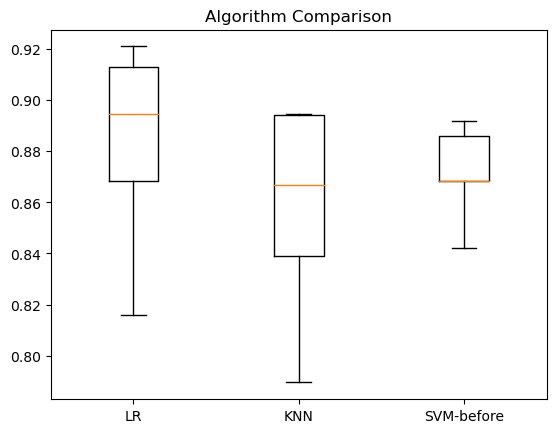

In [302]:
# Compare models' accuracy 
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

#### The best model is LR with 0.883 mean acurracy

### SVM parameter tuning
we will tunning SVM model's prameter to see if it will have the highest accuarcy between our models 

In [303]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

grid.fit(X_train,y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.868 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.868 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.868 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.868 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.868 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.816 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.855 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.880 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.907 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.827 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.816 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.829 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.867 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.827 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.840 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.842 total time=   0.0s
[CV 2/5] END ..C=1000, gamma

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [304]:
print ("Best parameters: ")
print (grid.best_params_) 

Best parameters: 
{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}


### Now we will compair the accuracy between the models after tuning the SVM parameter

In [305]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM-after', SVC(C= 10, gamma=0.0001, kernel= 'rbf')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True) #Repeats Stratified K-Fold n times
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())) #the mean accuracy for each model and the SD

LR: 0.883357 (0.033797)
KNN: 0.859459 (0.035311)
SVM-after: 0.880725 (0.035609)


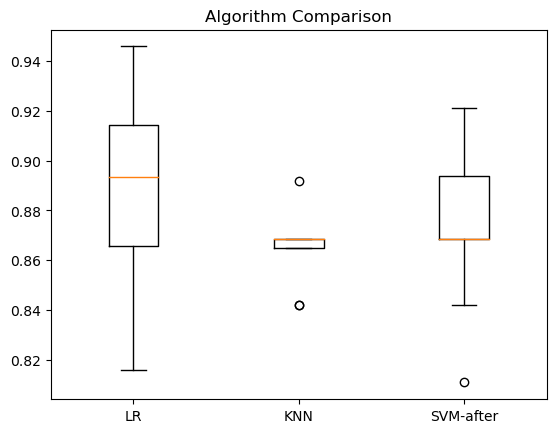

In [245]:
# Compare models' accuracy 
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

#### After tuning, still the best model is LR with 0.883 mean acurracy

### Make and evaluate predictions

In [306]:
# Make predictions on validation dataset (using the test data " X_test")
LR_prediction = logreg.predict(X_test)


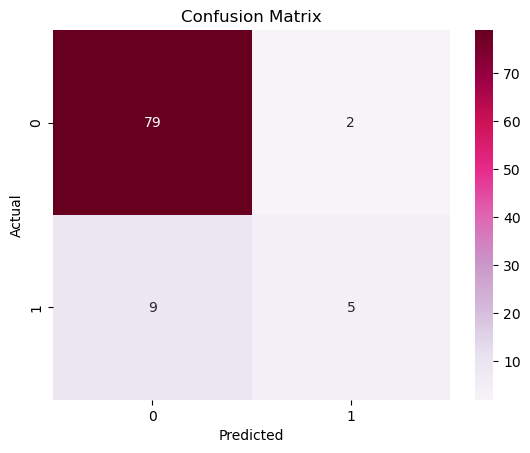

In [307]:
# Evaluate predictions
confusion_matrix = confusion_matrix(y_test.tolist(), LR_prediction.tolist())
# Plot the confusion matrix
sns.heatmap(confusion_matrix ,  cmap = "PuRd",annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [308]:
print('TN - True Negative {}'.format(confusion_matrix[0,0]))
print('FP - False Positive {}'.format(confusion_matrix[0,1]))
print('FN - False Negative {}'.format(confusion_matrix[1,0]))
print('TP - True Positive {}'.format(confusion_matrix[1,1]))


TN - True Negative 79
FP - False Positive 2
FN - False Negative 9
TP - True Positive 5


In [309]:

print(classification_report(y_test, LR_prediction))


              precision    recall  f1-score   support

           0       0.90      0.98      0.93        81
           1       0.71      0.36      0.48        14

    accuracy                           0.88        95
   macro avg       0.81      0.67      0.71        95
weighted avg       0.87      0.88      0.87        95



# Checking Null model to see if our model beat the null model, and yes it did!¶

In [310]:

# calculate the accuracy of the logistic regression model
accuracy_lr = accuracy_score(y_test,LR_prediction)
# create a null model that always predicts the majority class
majority_class = y_test.mode()[0]
y_pred_null = pd.Series([majority_class] * len(y_test))

# calculate the accuracy of the null model
accuracy_null = accuracy_score(y_test, y_pred_null)

# calculate the error rate of the logistic regression model and the null model
error_lr = 1 - accuracy_lr
error_null = 1 - accuracy_null

print(f"Logistic Regression accuracy: {accuracy_lr}")
print(f"Null Model accuracy {accuracy_null}")
print("///////////")
print(f"Logistic Regression Error: {error_lr}")
print(f"Null Model Error: {error_null}")


Logistic Regression accuracy: 0.8842105263157894
Null Model accuracy 0.8526315789473684
///////////
Logistic Regression Error: 0.11578947368421055
Null Model Error: 0.1473684210526316


#### Our model has the highest accuracy and lowest error rate than the null model which indicates that it good model to classify our data.

## Questions and answers


### Q1: Does the Review count affect the revenue of the product?
 We created a bar chart to help us study the relationship between the badge and rate count, and as observed, items with a high number of reviews are more likely to be purchased.
 

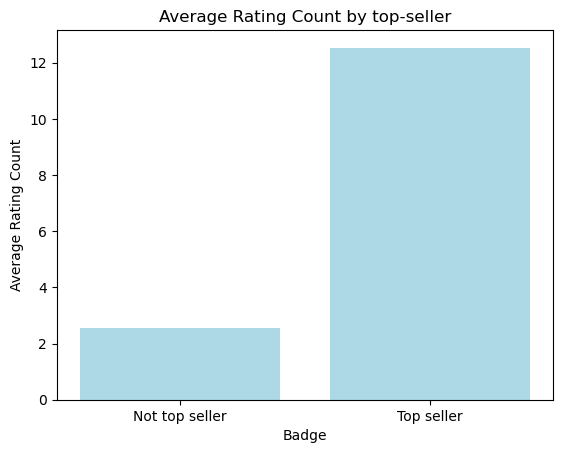

In [86]:
grouped = ikea.groupby('Badge')['Review_count'].mean()
plt.bar(grouped.index, grouped.values, color=['lightblue'])

# Add axis labels and a title
plt.xlabel('Badge')
plt.ylabel('Average Rating Count')
plt.title('Average Rating Count by top-seller')

# Show the chart
plt.show()

### Q2: Does applying discount makes item top seller?
We created a pie chart and concluded that it makes no difference whether the item has a discount or not , still the he percentage of “Not top seller” higher than “Top seller” 
However, the percentage increases if the product have “New lower price” compared to “Not have lower price”. 

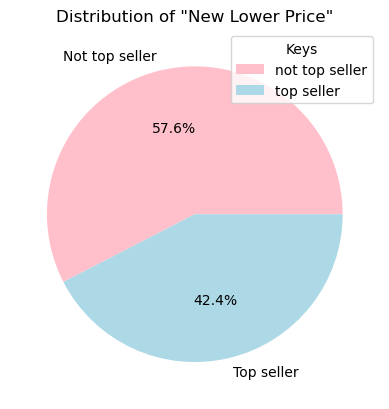

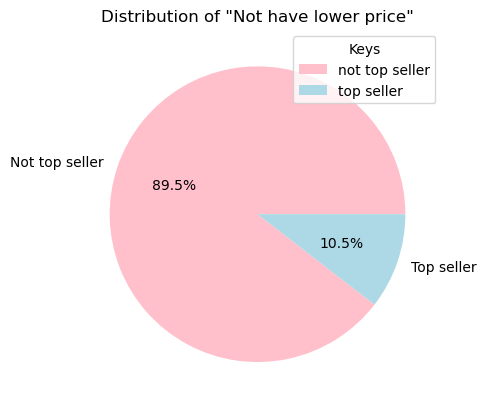

In [87]:
grouped = ikea.groupby(['Badge', 'Discount']).size().reset_index(name='count')

# Create a pie chart for each attribute value
for value in grouped['Discount'].unique():
    value = grouped[grouped['Discount'] == value]
    plt.pie(value['count'], labels=value['Badge'], autopct='%1.1f%%', colors=['pink','lightblue'])
    plt.legend(title='Keys', labels=['not top seller', 'top seller'], loc='upper right')
    titlePie=format(value)
    plt.title('Distribution of "{}"'.format(value['Discount'].unique()[0]))
    plt.show()

### Q3: What is the most requested item category?
As shown in the graph Bookcases and shelving units has the highest number of top sellers, as well as TV and media furniture, are among the most frequently purchased things, followed by wardrobes and tables, whereas trollies, children, and nursing furniture are among the least frequently purchased products

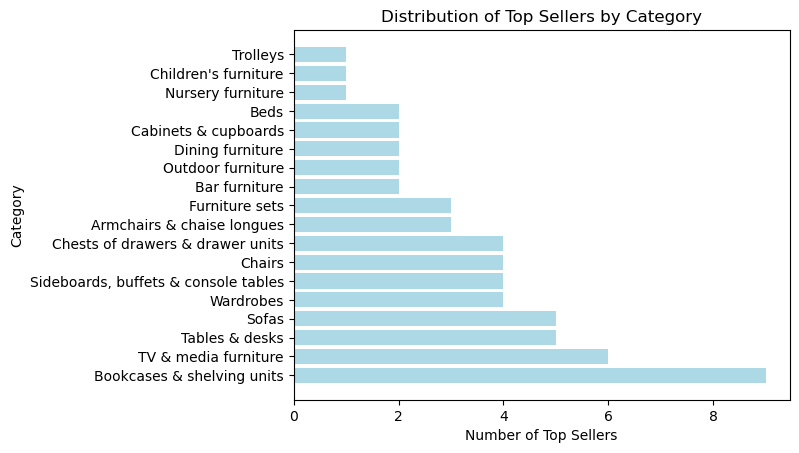

In [88]:
grouped = ikea[ikea['Badge'] == 'Top seller'].groupby('Category')['Badge'].count().reset_index(name='count')

# Sort the data by count in descending order
grouped = grouped.sort_values('count', ascending=False)

# Create a horizontal bar chart
plt.barh(grouped['Category'], grouped['count'], color=['lightblue'])

# Add axis labels and a title
plt.xlabel('Number of Top Sellers')
plt.ylabel('Category')
plt.title('Distribution of Top Sellers by Category')

# Show the chart
plt.show()

### Q4: do old or new products get discount?
The graph revealed that only old things receive discounts, which is logical given that old items sometimes require discounts in order to be sold.

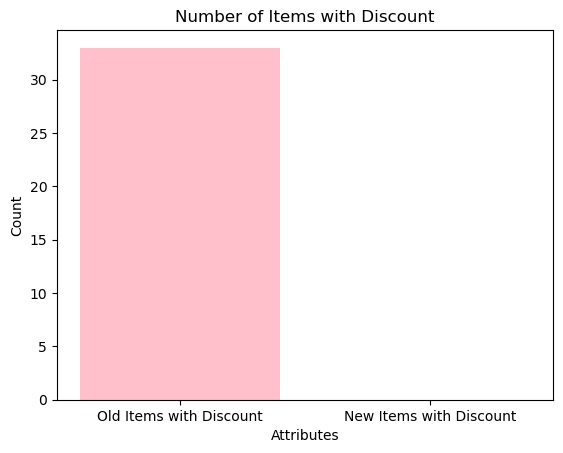

In [89]:
# count the number of old items with a discount
old_items_with_discount = ikea[(ikea['New_product'] == 'Not new') & (ikea['Discount'] == 'New Lower Price')].count()[0]

# count the number of new items with a discount
new_items_with_discount = ikea[(ikea['New_product'] == 'New') & (ikea['Discount'] == 'New Lower Price')].count()[0]

# create a bar chart
plt.bar(['Old Items with Discount', 'New Items with Discount'], [old_items_with_discount, new_items_with_discount], color=['pink', 'green'])
plt.xlabel('Attributes')
plt.ylabel('Count')
plt.title('Number of Items with Discount')
plt.show()

### Q5: if a product has more color option does it affect sales?
Surprisingly, having more options for the products had effect on sales, as shows that more than half of Top seller product have more options.

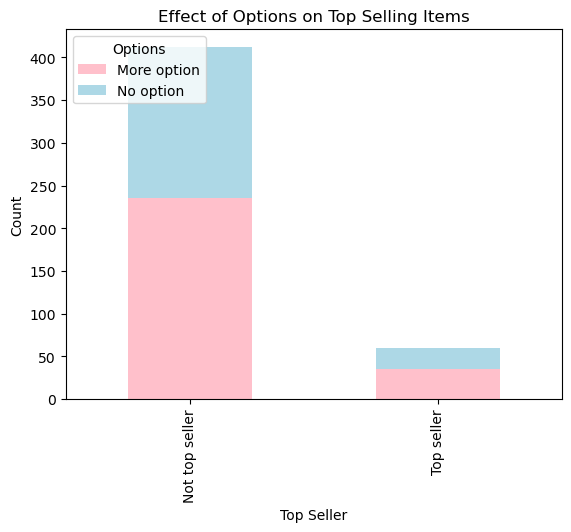

In [90]:
contingency_table = pd.crosstab(ikea['Badge'], ikea['have_Different_options'])

# creating a stacked bar chart
contingency_table.plot(kind='bar', stacked=True, color=['pink','lightblue'])
plt.xlabel('Top Seller')
plt.ylabel('Count')
plt.title('Effect of Options on Top Selling Items')
plt.legend(title='Options', loc='upper left')
plt.show()

### Q6:What are the pricing ranges that Ikea's customers typically purchase?
Ikea customers frequently purchase things ranging in price from 15SR to 1000SR, and as the price rises, the frequency with which they purchase decreases

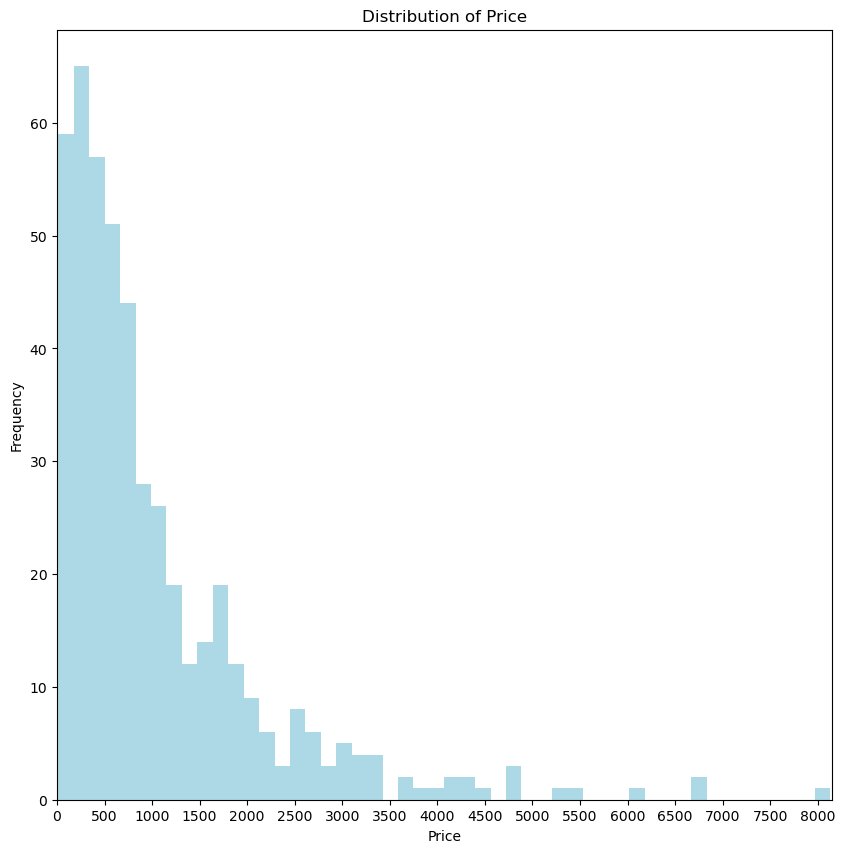

In [91]:
fig, ax = plt.subplots(figsize =(10, 10))

ax.hist(ikea['Price'] , bins =50 , color ='lightblue')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Price')
ax.set_xlim([0,8150])
ax.set_xticks(range(0 , 8150 , 500))
plt.show()

In [ ]:
# end 